## Divvy bike share case study: How to turn casual riders into annual members

<br>

### Table of Content

1. Introduction
1. Posing Questions
1. Data Collection
    * Dataset Overview
    * Data Cleaning
1. Exploratory Data Analysis
1. Conclusion

<br>

### Introduction

This analysis was made for a case study project

### Posing Questions

The purpose...

### Data Collection

Data used has been made available by Motivate Internatinoal Inc. for public use under [this license.](https://www.divvybikes.com/data-license-agreement)

* #### Dataset Overview

In [1]:
import pandas as pd
from glob import glob
import datetime as dt
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [2]:
plt.style.use(['seaborn-notebook'])

Let's take a look at one month of the original dataset.

In [3]:
pd.read_csv('./202004-202103-divvy-tripdata/202004-divvy-tripdata.csv')

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152.0,41.8964,-87.6610,41.9322,-87.6586,member
1,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499.0,41.9244,-87.7154,41.9306,-87.7238,member
2,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142,Indiana Ave & Roosevelt Rd,255.0,41.8945,-87.6179,41.8679,-87.6230,member
3,2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216,Wood St & Augusta Blvd,657.0,41.9030,-87.6975,41.8992,-87.6722,member
4,27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,125,Sheridan Rd & Lawrence Ave,323.0,41.8902,-87.6262,41.9695,-87.6547,casual
...,...,...,...,...,...,...,...,...,...,...,...,...,...
84771,200E9CDFC5685AA0,docked_bike,2020-04-16 16:10:16,2020-04-16 16:23:11,Dearborn Pkwy & Delaware Pl,140,Dearborn Pkwy & Delaware Pl,140.0,41.8990,-87.6299,41.8990,-87.6299,member
84772,F58A8F2ABCB5D95B,docked_bike,2020-04-30 17:56:12,2020-04-30 18:15:21,Kimbark Ave & 53rd St,322,Cottage Grove Ave & 51st St,351.0,41.7996,-87.5947,41.8030,-87.6066,casual
84773,A3754693A80E4913,docked_bike,2020-04-24 19:57:33,2020-04-24 21:50:43,Sedgwick St & Schiller St,236,Wells St & Elm St,182.0,41.9076,-87.6386,41.9032,-87.6343,casual
84774,D610CABB67F7B744,docked_bike,2020-04-02 17:59:55,2020-04-02 18:42:26,Damen Ave & Charleston St,310,Damen Ave & Charleston St,310.0,41.9201,-87.6779,41.9201,-87.6779,casual


Since we have 12 months of data, and each month is a seperate csv file, let's concatenate all of them into a single dataset.

First, select all the files in the folder with the same pattern using glob()

In [4]:
divvy_trip_data = glob('./202004-202103-divvy-tripdata/*divvy-tripdata.csv')
divvy_trip_data

['./202004-202103-divvy-tripdata/202004-divvy-tripdata.csv',
 './202004-202103-divvy-tripdata/202005-divvy-tripdata.csv',
 './202004-202103-divvy-tripdata/202006-divvy-tripdata.csv',
 './202004-202103-divvy-tripdata/202007-divvy-tripdata.csv',
 './202004-202103-divvy-tripdata/202008-divvy-tripdata.csv',
 './202004-202103-divvy-tripdata/202009-divvy-tripdata.csv',
 './202004-202103-divvy-tripdata/202010-divvy-tripdata.csv',
 './202004-202103-divvy-tripdata/202011-divvy-tripdata.csv',
 './202004-202103-divvy-tripdata/202012-divvy-tripdata.csv',
 './202004-202103-divvy-tripdata/202101-divvy-tripdata.csv',
 './202004-202103-divvy-tripdata/202102-divvy-tripdata.csv',
 './202004-202103-divvy-tripdata/202103-divvy-tripdata.csv']

Then use concat to congregate all the data into a single dataframe.

In [5]:
# parser used for changing "started_at" and "ended_at" column into datetime object
d_parser = lambda x: dt.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')
main_df = pd.concat((pd.read_csv(file, parse_dates=['started_at','ended_at'], date_parser = d_parser) for file in divvy_trip_data), ignore_index=True)

* #### Data Cleaning

There are a few NaN in the data. It seems like they are mainly columns related to "station".

In [6]:
main_df.isna().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    122175
start_station_id      122801
end_station_name      143242
end_station_id        143703
start_lat                  0
start_lng                  0
end_lat                 4738
end_lng                 4738
member_casual              0
dtype: int64

In [7]:
nan_df = main_df[main_df.isna().any(axis=1)]
nan_df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
1001,5E2BD03BCA180FBA,docked_bike,2020-04-07 11:53:08,2020-04-07 12:28:35,Wells St & Concord Ln,289,NaN,NaN,41.9121,-87.6347,NaN,NaN,member
1864,BD5813A6101E9BF4,docked_bike,2020-04-20 12:24:48,2020-04-20 12:29:46,Racine Ave & Wrightwood Ave,343,NaN,NaN,41.9289,-87.6590,NaN,NaN,member
2167,228691849C2081EE,docked_bike,2020-04-16 08:41:56,2020-04-16 11:33:48,Racine Ave & 18th St,15,NaN,NaN,41.8582,-87.6565,NaN,NaN,member
2458,ED7750BCEEE87174,docked_bike,2020-04-09 15:33:45,2020-04-09 16:34:54,Morgan Ave & 14th Pl,137,NaN,NaN,41.8624,-87.6511,NaN,NaN,casual
3834,1E00C457DCDA0835,docked_bike,2020-04-25 06:52:02,2020-04-25 07:17:54,Lake Shore Dr & Wellington Ave,157,NaN,NaN,41.9367,-87.6368,NaN,NaN,member


In [8]:
main_df.rideable_type.value_counts()

docked_bike      2558469
electric_bike     611406
classic_bike      319873
Name: rideable_type, dtype: int64

In [9]:
nan_df.rideable_type.value_counts()

electric_bike    189620
docked_bike        4178
classic_bike       1259
Name: rideable_type, dtype: int64

Significant portion of missing value's from electric_bike.
This is because electric_bike can be parked anywhere, not necessarily at a docking station.

In [10]:
195057 / 3489748 * 100

5.589429380001078

The original data had 3489748 rows and the data with no NaN has 3294691 rows.

Since the eliminated data is mere 5.5%, and electric bikes serve the exact same purpose as any other types of bikes, we will continue to analysis without considering the rows with NaN.

Use dropna() to delete all rows with NaN value.

In [11]:
main_df.dropna()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152,41.896400,-87.661000,41.932200,-87.658600,member
1,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499,41.924400,-87.715400,41.930600,-87.723800,member
2,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142,Indiana Ave & Roosevelt Rd,255,41.894500,-87.617900,41.867900,-87.623000,member
3,2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216,Wood St & Augusta Blvd,657,41.903000,-87.697500,41.899200,-87.672200,member
4,27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,125,Sheridan Rd & Lawrence Ave,323,41.890200,-87.626200,41.969500,-87.654700,casual
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3489742,081549DEA616CA22,electric_bike,2021-03-14 01:59:38,2021-03-14 03:13:09,Larrabee St & Armitage Ave,TA1309000006,New St & Illinois St,TA1306000013,41.918129,-87.643749,41.890808,-87.618779,member
3489743,9397BDD14798A1BA,docked_bike,2021-03-20 14:58:56,2021-03-20 17:22:47,Michigan Ave & Oak St,13042,New St & Illinois St,TA1306000013,41.900960,-87.623777,41.890847,-87.618617,casual
3489744,BBBEB8D51AAD40DA,classic_bike,2021-03-02 11:35:10,2021-03-02 11:43:37,Kingsbury St & Kinzie St,KA1503000043,New St & Illinois St,TA1306000013,41.889177,-87.638506,41.890847,-87.618617,member
3489745,637FF754DA0BD9E1,classic_bike,2021-03-09 11:07:36,2021-03-09 11:49:11,Michigan Ave & Oak St,13042,Clark St & Berwyn Ave,KA1504000146,41.900960,-87.623777,41.977997,-87.668047,member


<br>

We'll create a column named "ride_length." This column can be calculated by subtracting the column "started_at" from the column "ended_at."

In [12]:
main_df['ride_length'] = main_df['ended_at'] - main_df['started_at']

Also, let's convert ride_length's unit to minute

In [13]:
main_df['ride_length'] = main_df['ride_length'].dt.seconds//60

If ride_length is more than 2 hours, we'll consider it unreturned, and delete these outliars.

In [14]:
main_df.drop(main_df.loc[main_df['ride_length'] > 2 * 60].index, inplace=True)

Next, we'll create a column named “day_of_week.” where Monday=0, and Sunday=6.

In [15]:
main_df['day_of_week'] = main_df.started_at.dt.dayofweek

<br>

### Exploratory Data Analysis

In [16]:
# Compare members and casual users's ride_length

member_ride_length = main_df.loc[main_df.member_casual == 'member'].ride_length

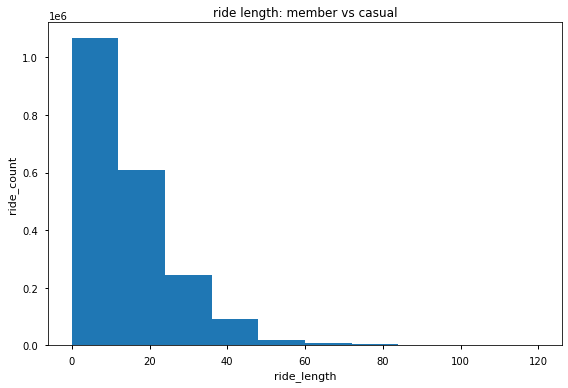

In [17]:
plt.hist(member_ride_length)

plt.title('ride length: member vs casual')
plt.xlabel('ride_length')
plt.ylabel('ride_count')
plt.tight_layout()
plt.show()

### Conclusion